In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [7]:
tweets= pd.read_csv("data/Sentiment.csv")
tweets.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [9]:
tweets=tweets[['text','sentiment']]

In [10]:
def transformSentiment(x):
    if x=='Neutral':
        return 0
    elif x=='Negative':
        return -1
    else:
        return 1

In [11]:
tweets['sentiment']=tweets['sentiment'].apply(transformSentiment)

In [12]:
tweets.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [13]:
mood_count=tweets['sentiment'].value_counts()

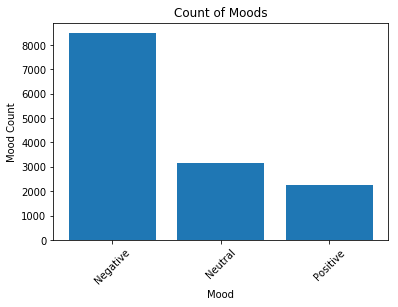

In [14]:
Index = [1,2,3]
plt.bar(Index,mood_count)
plt.xticks(Index,['Negative','Neutral','Positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')
plt.show()

# Word Cloud

In [15]:
from wordcloud import WordCloud,STOPWORDS
import re
from nltk.corpus import stopwords

In [16]:
def cleanedWords(raw_tweet):
    raw_tweet=raw_tweet.replace("RT","")
    raw_tweet=re.sub("@\w+:?", "",raw_tweet)
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()                            
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words
                       if 'http' not in w
                       and w not in ["gopdebate","gopdebates"]
                       and w not in stops]
    return meaningful_words

def getWordCloud(Tweet, sentiment):
    df=Tweet[Tweet['sentiment'] == sentiment]
    words = ' '.join(df['text'])
    cleaned_word = " ".join(cleanedWords(words))
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     )
    wordcloud.generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

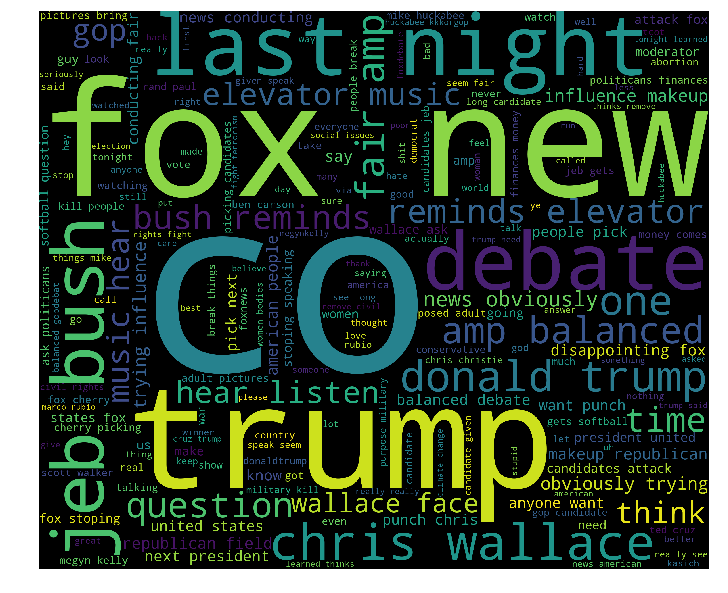

In [18]:
getWordCloud(tweets,-1)

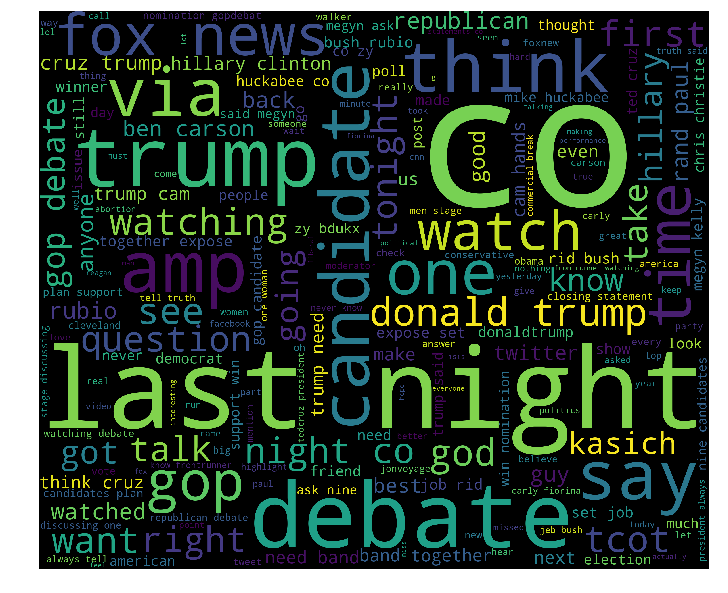

In [19]:
getWordCloud(tweets,0)

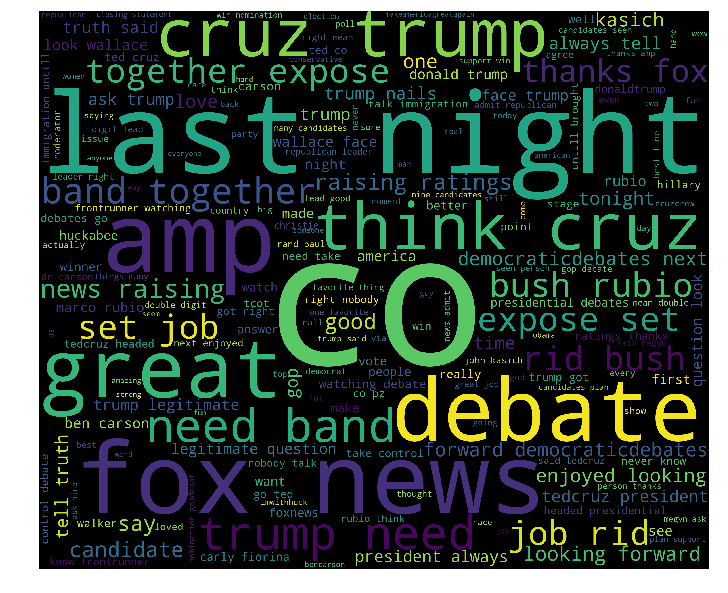

In [20]:
getWordCloud(tweets,1)

# Cleaning

In [21]:
import nltk

def tweet_to_words(raw_tweet):
    return( " ".join( cleanedWords(raw_tweet) ))

In [22]:
tweets['clean_tweet']=tweets['text'].apply(lambda x: tweet_to_words(x))

In [23]:
tweets[['clean_tweet','text']].head()

,clean_tweet,text
0,everyone feel climate change question last nig...,RT @NancyLeeGrahn: How did everyone feel about...
1,catch full last night scott best lines seconds...,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,mention tamir rice held cleveland wow,RT @TJMShow: No mention of Tamir Rice and the ...
3,carly fiorina trending hours debate men comple...,RT @RobGeorge: That Carly Fiorina is trending ...
4,w delivered highest ratings history presidenti...,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [24]:
train,test = train_test_split(tweets,test_size=0.1,random_state=42)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train['clean_tweet'].values)
test_features=v.transform(test['clean_tweet'].values)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [27]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]


In [28]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

/home/vivekviswambharan/anaconda3/envs/3point6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegression is 0.6095100864553314
Accuracy of KNeighborsClassifier is 0.5842939481268011


/home/vivekviswambharan/anaconda3/envs/3point6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC is 0.6095100864553314
Accuracy of DecisionTreeClassifier is 0.6440922190201729
Accuracy of RandomForestClassifier is 0.6923631123919308
Accuracy of AdaBoostClassifier is 0.6390489913544669
Accuracy of GaussianNB is 0.4243515850144092


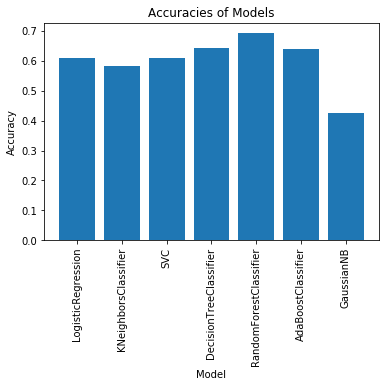

In [29]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()